In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Lagrange():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.N = len(x)
        self.l_array = np.empty(self.N)
        for i in range(self.N):
            self.l_array[i] = 1
            for j in range(self.N):
                if i == j:
                    continue
                self.l_array[i] *= self.x[i] - self.x[j]
                
    def calculate(self, x):
        y_result = np.empty(len(x))
        for k, x_i in enumerate(x):
            res = 0
            for i in range(self.N):
                l_i = 1
                for j in range(self.N):
                    if i == j:
                        continue
                    l_i *= x_i - self.x[j] 
                res += self.y[i] * l_i / self.l_array[i]
            y_result[k] = res
        return y_result

In [3]:
class Newton():
    def __init__(self, x_array, y_array):        
        def diff(x, y):
            res = 0
            for i in range(len(x)):
                tmp = 1
                for j in range(len(x)):
                    if i == j:
                        continue
                    tmp *= x[i] - x[j]
                res += y[i] / tmp
            return res

        self.x = x_array
        self.y = y_array
        self.N = len(self.x)
        self.diff = np.empty(self.N)
        for i in range(len(x_array)):
            self.diff[i] = diff(self.x[:i+1], self.y[:i+1])

    def calculate(self, x):
        y_result = np.empty(len(x))
        for i, x_i in enumerate(x):
            res = 0
            for k in range(self.N):
                tmp = 1
                for j in range(k):
                    tmp *= x_i - self.x[j]
                res += self.diff[k] * tmp
            y_result[i] = res
        return y_result

In [4]:
def x_k(k, n):
    return 1 + k/n

def y_k(x):
    return np.log(x)

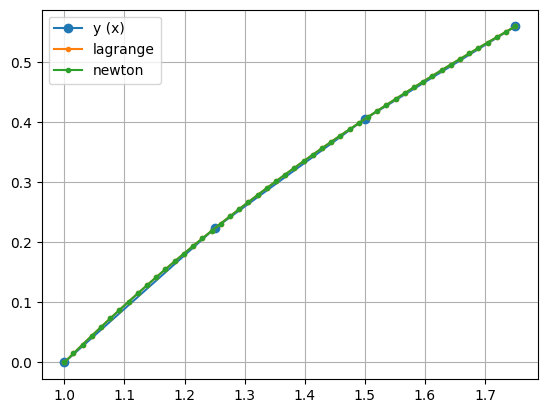

In [5]:
N = 4
k = np.arange(0, N)
x = x_k(k, N)
y = y_k(x)
x1 = np.linspace(x[0], x[-1], 50)

L = Lagrange(x, y)
N = Newton(x, y)
res_l = L.calculate(x1)
res_n = N.calculate(x1)

plt.plot(x, y, marker="o", label="y (x)")
plt.plot(x1, res_l, marker=".", label="lagrange")
plt.plot(x1, res_n, marker=".", label="newton")

plt.legend()
plt.grid()
plt.show()

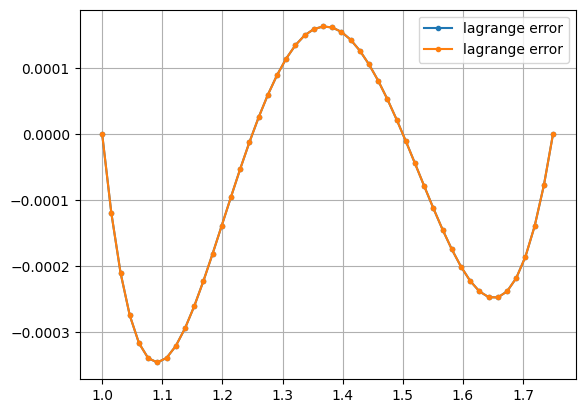

In [6]:
plt.plot(x1, res_l-y_k(x1), marker=".", label="lagrange error")
plt.plot(x1, res_n-y_k(x1), marker=".", label="lagrange error")
plt.legend()
plt.grid()
plt.show()